# Exploratory Data Analysis - Titanic 

The aim of this project is to analyze the Titanic Dataset. This includes the following steps: 

1. Defining a list of questions to be answered 
2. Data profiling and Data cleaning 
3. Data Exploration and Analysis 
4. Summarization of findings 

##  List of questions to be answered from data analysis 

1. What was the distribution of the passengers that were travelling on titanic based on gender, passenger class and Embarked Station 
2. How many passengers survived based on gender, passenger class and Embarked Station 
3. What is the distribution of Age across the passengers
4. Is there any relationship between the Age of the passenger and ticket Fare 
5. Is there any relationship between Age and Survival chance

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import Colormap
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="darkgrid")
sns.set_palette("colorblind")

In [2]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn ', sns.__version__)

Numpy:  1.14.3
Pandas:  0.23.0
Seaborn  0.9.0


In [3]:
#Importing CSV data file
titanicdf = pd.read_table('dat/titanic.csv',header = 0 , sep=',')
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Profiling

In [4]:
titanicdf.shape

(891, 12)

In [5]:
titanicdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanicdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanicdf.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Our dataset consists of 891 total rows, however from the above we can see that Age, Cabin and Embarked have less than 891 non-null values. This indicates that there maybe some missing values. and we will investigate this further below.

### Missing Values

In [9]:
titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above we can see that there are 177 records out of 891 (20%) that have age missing. 20% is a significant portion of the dataset and since age is also an important data point for analysis , I will not remove the missing age values and instead will replace the missing values with the median age for the Passenger Class & Gender group. 
The Embarked has only two missing values so this will be replaced by the most frequent value. 
Whereas the Cabin has 687 missing values and for this reason this column will be dropped for analysis. 

#### Age column

In [10]:
#Finding the median ages 
titanicdf.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [11]:
#Adding a new revised column for age 
titanicdf['Revised_Age'] = titanicdf['Age']
titanicdf['Revised_Age'] = titanicdf.groupby(['Pclass', 'Sex'])['Revised_Age'].transform(lambda x: x.fillna(x.median()))
titanicdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Revised_Age
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0


In [12]:
## Checking the results of revised_age
titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Revised_Age      0
dtype: int64

A new column Revised_Age has now been created where the missing values have been replaced  with the median age for the Passenger Class & Gender group. 

In [13]:
#Dropping the columns not required for Analysis
titanic_cleaned = titanicdf.drop(columns=['Age','Cabin'])
titanic_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Revised_Age    0
dtype: int64

#### Embarked Column

In [14]:
# Replacing the two missing values in Embarked columns with the most occuring one
max_embarked = titanic_cleaned['Embarked'].value_counts()
#max_embarked
#max_embarked.idxmax()
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].fillna(max_embarked.idxmax())
titanic_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Revised_Age    0
dtype: int64

### Rounding Fare to 2 decimals 

In [15]:
#Rounding Fare to 2 decimals 
titanic_cleaned['Fare'] = titanic_cleaned.Fare.round(2)
#titanic_cleaned

### Renaming the columns for analysis

In [16]:
titanic_cleaned.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age']


## Data Analysis

In [17]:
titanic_cleaned.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204366,29.112424
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693414,13.304424
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910000,21.500000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.450000,26.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,36.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.330000,80.000000


### Correlation Matrix

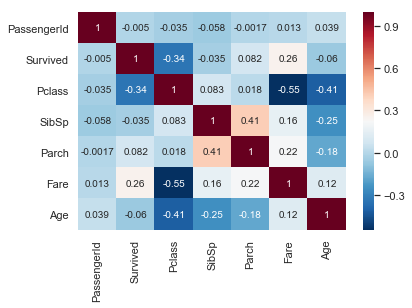

In [18]:
corr = titanic_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r")

C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


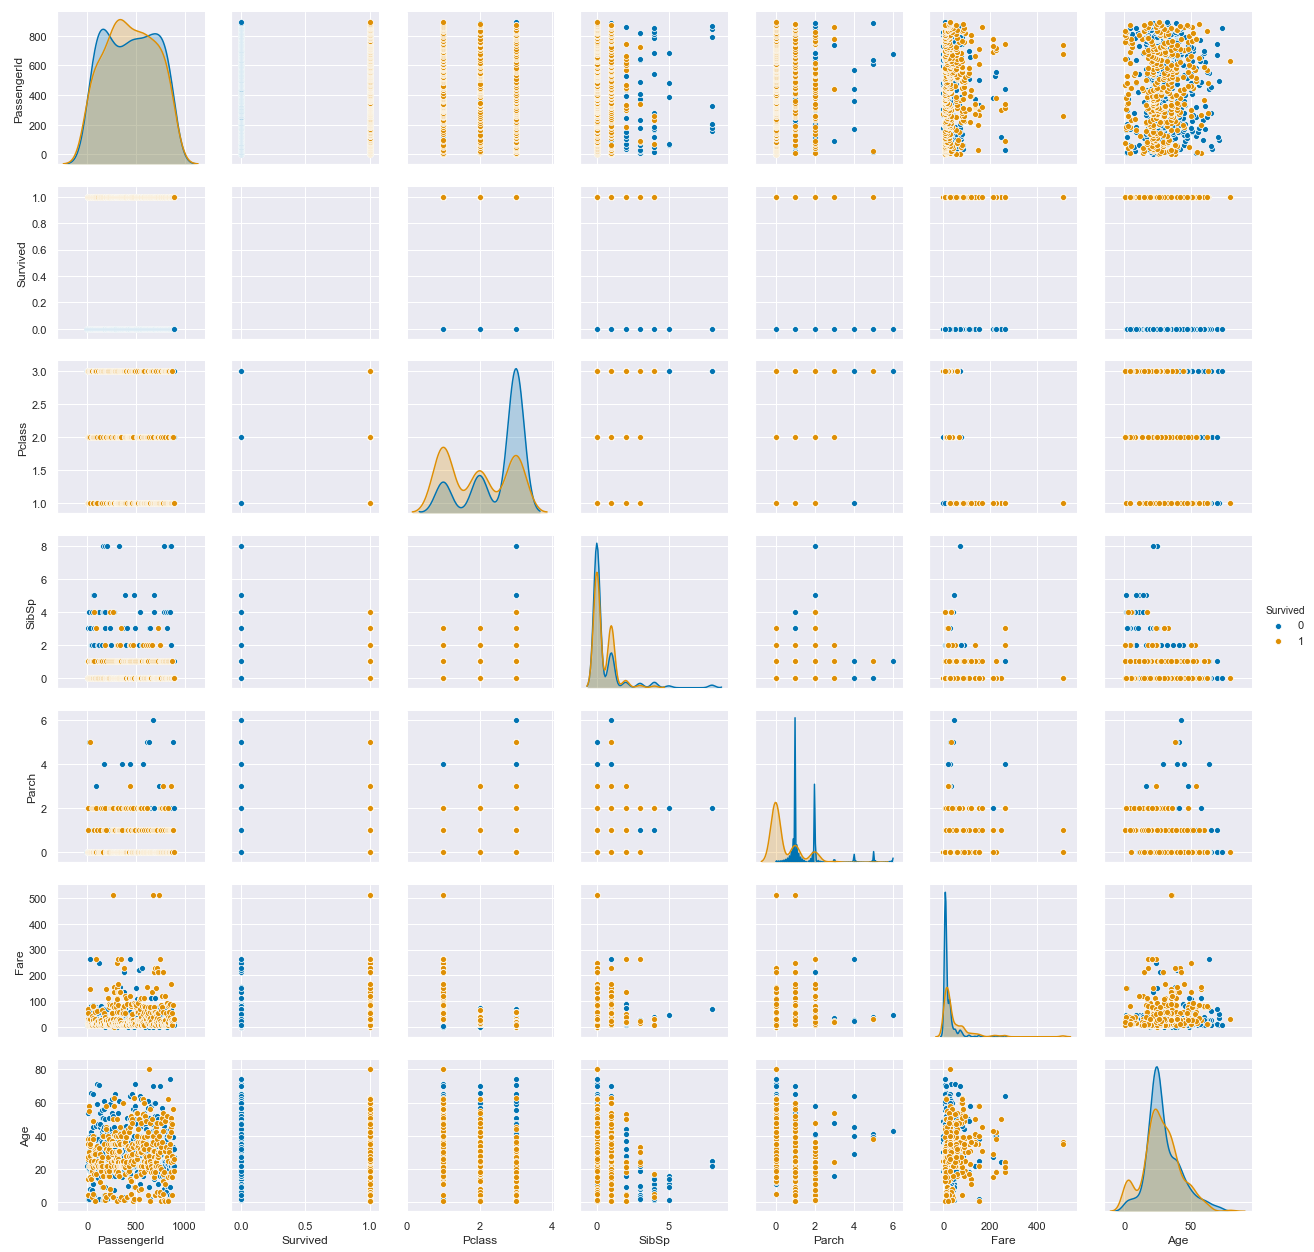

In [19]:
sns.pairplot(titanic_cleaned,kind='scatter',hue='Survived')

From the correlation matrix the following observations can be made: 
-  A negative correlation between Fare & Pclass 
-  A negative correlation between Pclass & Age 
-  A negative correlation between Pclass & Survived
-  A positive correlation between SibSp & Parch

### 1.  Passengers Travelling Analysis

#### Overall Male Vs Female

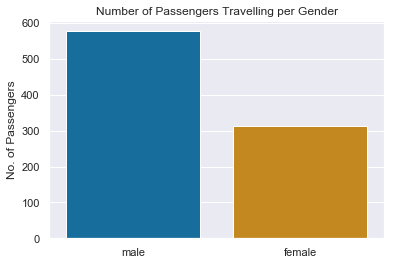

In [20]:
sns.countplot (x = 'Sex', data = titanic_cleaned)
plt.ylabel ('No. of Passengers')
plt.xlabel('')
plt.title('Number of Passengers Travelling per Gender')
plt.show()

There were more Males travelling than Females 

#### Overall Passenger Class

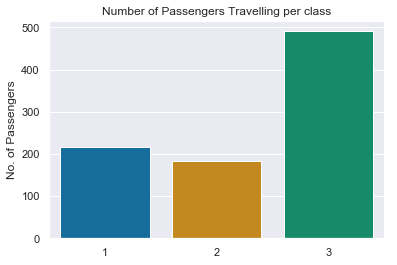

In [21]:
sns.countplot(x = 'Pclass', data = titanic_cleaned)
plt.ylabel ('No. of Passengers')
plt.xlabel('')
plt.title('Number of Passengers Travelling per class')
plt.show()

Majority of the passengers were travelling in Passenger Class 3

#### Gender Vs Passenger Class

Text(0.5,1,'Gender Vs Passenger Class - Passengers')

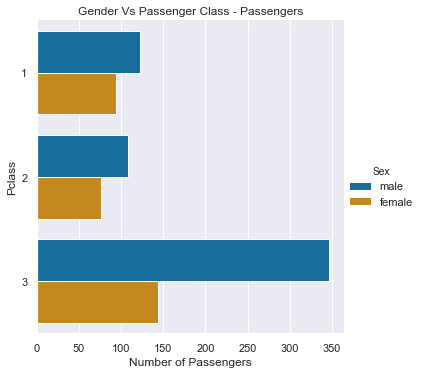

In [22]:
sns.catplot(y="Pclass" ,hue="Sex",data=titanic_cleaned,kind="count")
plt.xlabel('Number of Passengers')
plt.title('Gender Vs Passenger Class - Passengers')

We can see that males are in majority for the all classes. The number of males travelling in Passenger Class 3 is almost double than the females. 

#### Where did the passengers board the ship from? 

Text(0.5,1,'Total number of Passengers - Embarked Station')

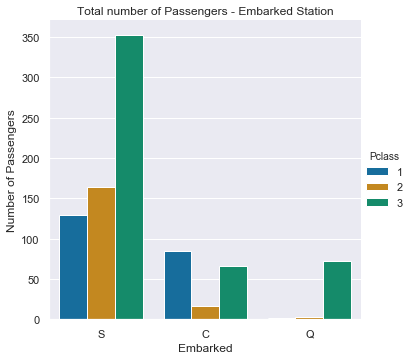

In [23]:
sns.catplot('Embarked', data=titanic_cleaned, kind='count', hue='Pclass')
plt.ylabel('Number of Passengers')
plt.title('Total number of Passengers - Embarked Station')

Most of the passengers embarked from Southampton. It is also interesting to note that passengers that embarked from Queenstown were mostly in Passenger Class 3 and a very few in Passenger Class 2. 

### 2. Passengers Survival Analysis

#### Male Vs Female 

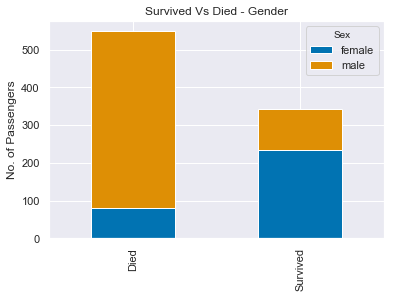

In [24]:
titanic_cleaned.groupby(['Survived','Sex'])['PassengerId'].count().unstack().plot(kind='bar', stacked = True)
plt.ylabel ('No. of Passengers')
plt.xlabel('')
plt.title('Survived Vs Died - Gender')
labels = ['Died','Survived']
plt.xticks(titanic_cleaned['Survived'], labels)
plt.show()

Females have a higher survival rate than Males showing that females were given priority during evacuation in terms of Gender

#### Passenger Class

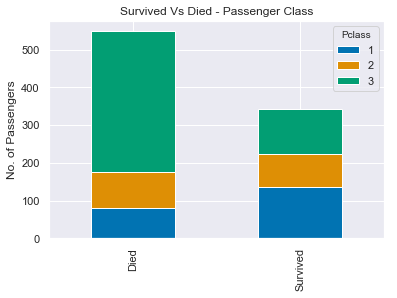

In [25]:
titanic_cleaned.groupby(['Survived','Pclass'])['PassengerId'].count().unstack().plot(kind='bar', stacked = True)
plt.ylabel ('No. of Passengers')
plt.xlabel('')
plt.title('Survived Vs Died - Passenger Class')
labels = ['Died','Survived']
plt.xticks(titanic_cleaned['Survived'], labels)
plt.show()

Passenger Class 1 had a larger survival rate whereas Class 3 had a lower survival rate. This shows that Passengers of Class 1 were given first priority during evacuation in terms of Passenger Class.

####  Gender Vs Passenger Class 

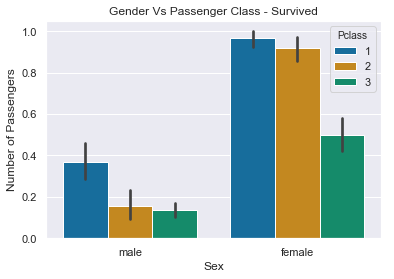

In [26]:
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = titanic_cleaned)
plt.ylabel('Number of Passengers')
plt.title('Gender Vs Passenger Class - Survived')
plt.show()

Passengers in Class 1 have a higher survival rate especially the females. 

#### Embarked Station

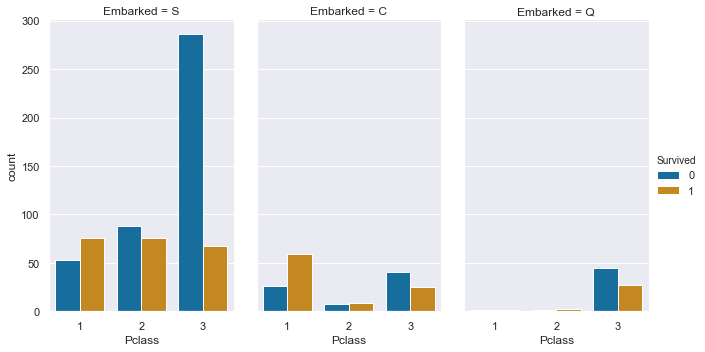

In [27]:
sns.catplot(x="Pclass" ,hue="Survived", col="Embarked",data=titanic_cleaned,kind="count", aspect=.6, height = 5)

It is interesting to note from the above graph that for Queenstown Passenger Class 2 there is 100% survival. 

### 3. Age Distribution 

#### How many males & females were travelling on Titanic

In [28]:
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_cleaned['age_group'] = pd.cut(titanic_cleaned.Age, range(0, 81, 10), labels=age_labels)
#titanic_cleaned.head()

In [29]:
titanic_agedist = titanic_cleaned[['Sex','age_group','PassengerId']].groupby(['Sex','age_group']).count()
titanic_agedist = titanic_agedist.reset_index(level=['Sex','age_group'])
titanic_agedist = titanic_agedist.rename(columns={"PassengerId": "count"})
#titanic_agedist

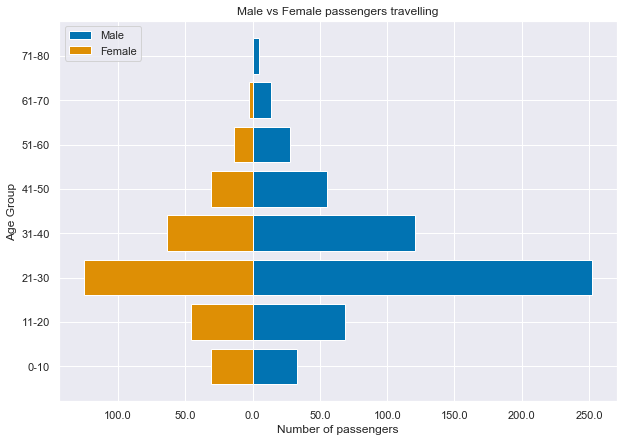

In [30]:
female = np.array(titanic_agedist[titanic_agedist['Sex'] == 'female']['count'])
male = np.array(titanic_agedist[titanic_agedist['Sex'] == 'male']['count'])
age_group = np.array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
labels = ['Male','Female']
plt.figure(figsize=(10,7))
plt.barh(age_group,male)
plt.barh(age_group,-female)
plt.legend(labels)
plt.yticks(age_group)
plt.gca().set_xticklabels([abs(x) for x in plt.gca().get_xticks()])
plt.xlabel('Number of passengers')
plt.ylabel('Age Group')
plt.title('Male vs Female passengers travelling')
plt.show()

From the chart above we can see that the majority of the passengers travelling were in the age group of 21 and 30. 

#### How many males & females survived 

In [31]:
titanic_survived = titanic_cleaned[['Survived','Sex','age_group','PassengerId']].groupby(['Sex','age_group','Survived']).count()
titanic_survived = titanic_survived.reset_index(level=['Sex','age_group','Survived'])
titanic_survived = titanic_survived.rename(columns={"PassengerId": "count"})
titanic_survivors = titanic_survived[titanic_survived['Survived'] == 1]
#titanic_survived

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


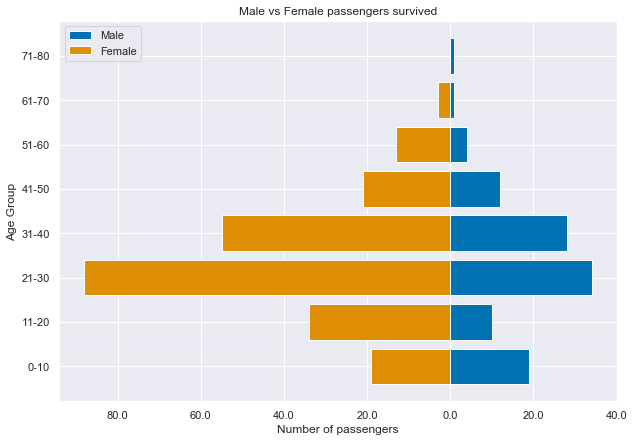

In [32]:
female = np.array(titanic_survivors[titanic_survived['Sex'] == 'female']['count'])
male = np.array(titanic_survivors[titanic_survived['Sex'] == 'male']['count'])
age_group = np.array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
labels = ['Male','Female']
plt.figure(figsize=(10,7))
plt.barh(age_group,male)
plt.barh(age_group,-female)
plt.legend(labels)
plt.yticks(age_group)
plt.gca().set_xticklabels([abs(x) for x in plt.gca().get_xticks()])
plt.xlabel('Number of passengers')
plt.ylabel('Age Group')
plt.title('Male vs Female passengers survived')
plt.show()

The above two graphs show the distribution of Males & Females that were travelling on Titanic. We can see that Females were given priority during evacuation. 

The chart above confirms that the females have a higher chance of survival compared to the males.

### 4. Distribution of Age & Fare across passengers

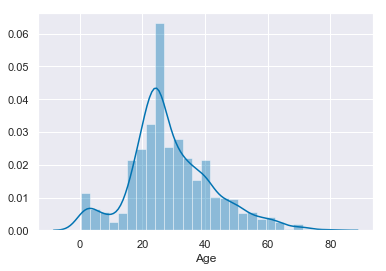

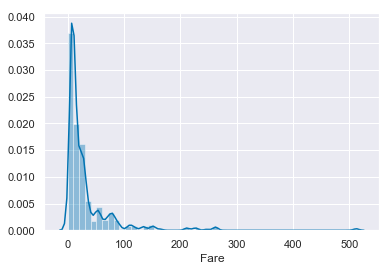

In [33]:
#Distributions of Age & Fare 
cols = ['Age', 'Fare']
for col in cols:
    sns.distplot(titanic_cleaned[col])
    plt.show()

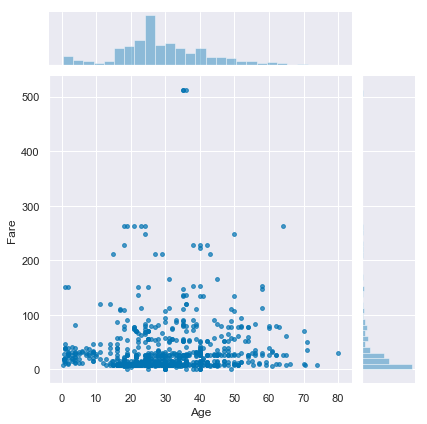

In [34]:
sns.jointplot(x='Age', y ='Fare' , data=titanic_cleaned, s = 15 ,alpha = 0.7)

Most of the passengers bought a ticket which was under 50 pounds. The highest fare tickets were bought by passengers between the age of 18-65. There doesnt appear to be any direct relationship between the age of the passenger and ticket they purchased. However, there are also a few data points where the fare is above 500 pound and will need to be investigated further to check if this is an outlier. 

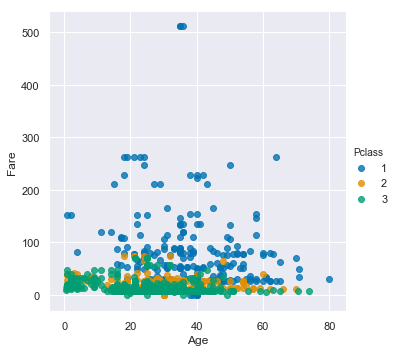

In [35]:
sns.lmplot(x='Age',y='Fare',hue='Pclass',data = titanic_cleaned,fit_reg = False )

From the chart above we see that passengers with a higher Fare have more chances of survival which again supports our previous result that the survival rate of the Passengers in Class 1 was higher. Therefore, we can clearly say that Passengers in Class 1 were given prioity over Passengers in Class 2 and 3. 

#### Outlier Investigation 

##### Fare Boxplot 

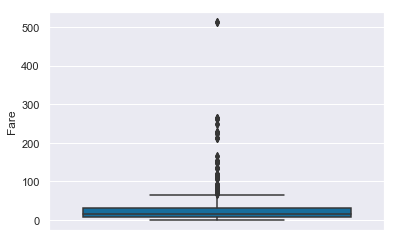

In [36]:
sns.boxplot(y=titanic_cleaned["Fare"])

From the box plot above we can see that there are a few values outside the range. This is a clear indication of an outlier, however it does not prove whether the outlier can still be removed. To further confirm we will plot the boxplot for each passenger class and check which class the outlier belongs too. 

##### Fare Boxplot per Passenger class

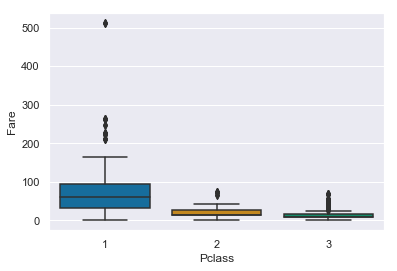

In [37]:
sns.boxplot(x = "Pclass", y= "Fare",data=titanic_cleaned)

From the boxplots above, we can again see that there are some values that are far away from the other range of values.However, these values are for Passenger Class 1. 
Since the outlier belongs to Passenger Class 1 it will require further investigation to whether this is a measurement error or if the passenger actually paid twice as much as any other passenger. To confirm whether this is an outlier I will check the passengers who paid the maximum amount. 

##### Which passenger paid the maximum fare

In [38]:
titanic_cleaned[titanic_cleaned['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age,age_group
258,259,1,1,"Ward, Miss. Anna",female,0,0,PC 17755,512.33,C,35.0,31-40
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,0,1,PC 17755,512.33,C,36.0,31-40
737,738,1,1,"Lesurer, Mr. Gustave J",male,0,0,PC 17755,512.33,C,35.0,31-40


To check whether this is an outlier or not, the Passenger names on the Titanic Encyclopedia (https://www.encyclopedia-titanica.org/titanic-first-class-passengers/) was verified. The titanic encylopaedia also shows that the ticket number PC17755 was a high amount and the recorded fare is actually correct. Thus the record will be retained for analysis

## 5. Relationship between Age and Survival chance

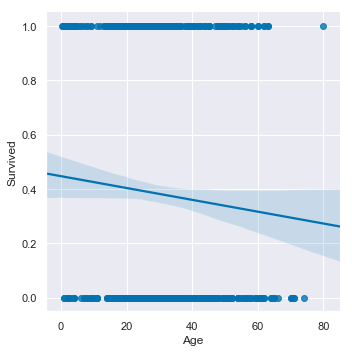

In [39]:
sns.lmplot('Age','Survived',data=titanic_cleaned)

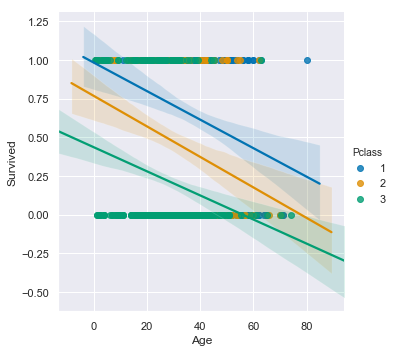

In [40]:
sns.lmplot('Age','Survived',data=titanic_cleaned,hue='Pclass')

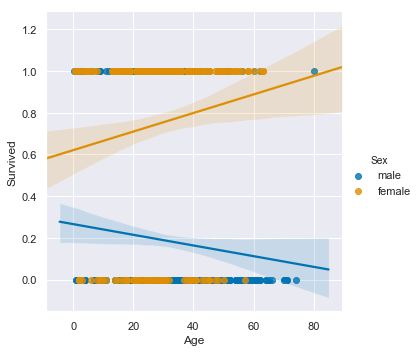

In [41]:
sns.lmplot('Age','Survived',data=titanic_cleaned,hue='Sex')

From the graph above we can see that older the passenger, the chance of survival is less. Although in the case of Females this is opposite and it can be seen that older females survived more which again proves that females were given priority over males during evacuation.

# Results

1. There were more males travelling than females, however the survival rate for females is higher than the males indicating that females were given priority over males during evacuation. 
2. There are more survivors in Passenger Class 1 , indicating that passengers in the highest Passenger Class 1 were also given priority during evacuation. 
3. Most of the passengers travelling were from the age group 20-35
4. There were more passengers travelling in Passenger Class 3 and most of them bought a ticket a under 50 Pounds